In [1]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load PM2.5 data from 2018~2020
#The shape of input of RNN is (batch_size, timesteps, units).
x_train, y_train = np.load("train_x_rnn.npy"), np.load("train_y_rnn.npy")
x_test, y_test = np.load("test_x_rnn.npy"), np.load("test_y_rnn.npy")
x_train, y_train = x_train.astype('float32'), y_train.astype('float32')
x_test, y_test = x_test.astype('float32'), y_test.astype('float32')

print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

(19257, 24, 6) (19257, 1) (4815, 24, 6) (4815, 1)


In [3]:
##make RNN
#keras.layers.SimpleRNNCell corresponds to the SimpleRNN layer.
#keras.layers.GRUCell corresponds to the GRU layer.
#keras.layers.LSTMCell corresponds to the LSTM layer.
# if return_sequences=False --> output.shape == (batch_size, units)
# if return_sequences=True --> output.shape == (batch_size, timesteps, units)

rnn = Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    layers.LSTM(16, input_shape=(24, 6), return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    # Shape [batch, time, features] => [batch, lstm_units]
    layers.LSTM(16, return_sequences=False),
    layers.Dense(1)
  ])

#Note : NotImplementedError: Cannot convert a symbolic Tensor의 해결 방법
#이는 numpy 버전이 너무 높아서 tensorflow에서 아직 구현을 못한 것이다.  numpy 버전을 낮추면 된다
#pip uninstall numpy
#conda install numpy=1.19.5 -c conda-forge

2021-09-20 11:51:13.228415: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-20 11:51:13.228837: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [5]:
#Once the model is created, you can config the model with losses and metrics
#with model.compile(), 
#train the model with model.fit(), 
#or use the model to do prediction with model.predict().
rnn.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [6]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 16)            1472      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 16)            2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 16)            2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,825
Trainable params: 7,825
Non-trainable params: 0
_________________________________________________________________


In [7]:
#let's do whether model works okay
example_batch = x_train[0:2]
example_result = rnn.predict(example_batch)

2021-09-20 11:51:18.162799: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_2991' and '__inference_standard_lstm_2880_specialized_for_sequential_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_4120' both implement 'lstm_bf4863f6-9beb-4574-b891-6646b3eb991c' but their signatures do not match.


In [8]:
example_result
print(np.shape(x_train[0:2]), np.shape(example_result))

(2, 24, 6) (2, 1)


In [9]:
#Let's do training with model.fit
EPOCHS = 200
history = rnn.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.1, verbose=1)

Train on 17331 samples, validate on 1926 samples
Epoch 1/200


2021-09-20 11:51:23.511987: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_11810_12295_specialized_for_StatefulPartitionedCall_2_at___inference_distributed_function_12966' and '__inference___backward_standard_lstm_11810_12295' both implement 'lstm_86018071-b6dc-4ac2-8fbb-23afe28cdbd5' but their signatures do not match.


17312/17331 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045

2021-09-20 11:52:17.922500: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_16191_specialized_for_sequential_lstm_3_StatefulPartitionedCall_at___inference_distributed_function_16533' and '__inference_cudnn_lstm_with_fallback_16302' both implement 'lstm_813e7d1b-99f4-41b1-a5af-fc59812cbcb5' but their signatures do not match.


17331/17331 [==============================] - 61s 4ms/sample - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2/200
17331/17331 [==============================] - 53s 3ms/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/200
17331/17331 [==============================] - 54s 3ms/sample - loss: 8.1798e-04 - mse: 8.1798e-04 - val_loss: 8.2084e-04 - val_mse: 8.2084e-04
Epoch 4/200
17331/17331 [==============================] - 48s 3ms/sample - loss: 7.3288e-04 - mse: 7.3288e-04 - val_loss: 7.5251e-04 - val_mse: 7.5251e-04
Epoch 5/200
17331/17331 [==============================] - 49s 3ms/sample - loss: 6.9008e-04 - mse: 6.9008e-04 - val_loss: 7.3000e-04 - val_mse: 7.3000e-04
Epoch 6/200
17331/17331 [==============================] - 51s 3ms/sample - loss: 6.8061e-04 - mse: 6.8061e-04 - val_loss: 7.5859e-04 - val_mse: 7.5859e-04
Epoch 7/200
17331/17331 [==============================] - 51s 3ms/sample - loss: 6.7018e-04 - mse: 6.7018e-

In [10]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
195,0.000380,0.000380,0.000724,0.000724,195
196,0.000377,0.000377,0.000730,0.000730,196
197,0.000376,0.000376,0.000721,0.000721,197
198,0.000376,0.000376,0.000730,0.000730,198
199,0.000372,0.000372,0.000768,0.000768,199


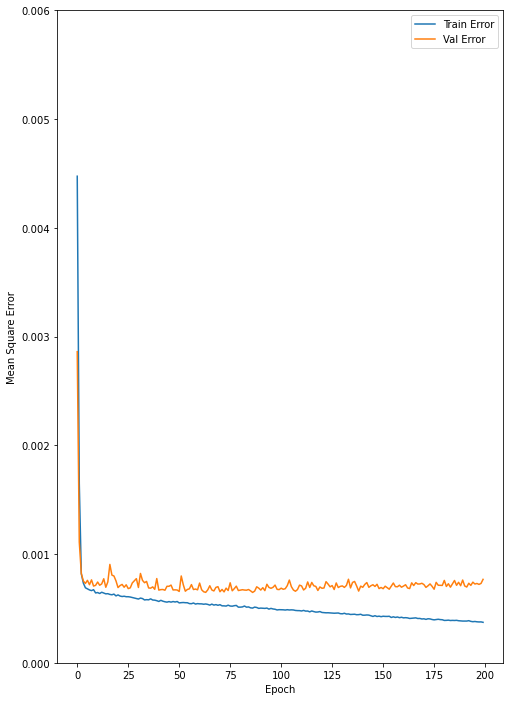

In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.006])
  plt.legend()
  plt.show()

plot_history(history)

In [12]:
test_predictions = rnn.predict(x_test).flatten()
print(np.shape(y_test))

(4815, 1)


In [13]:
#Evaluate with test set
loss,  mse = rnn.evaluate(x_test, y_test, verbose=2)
pm25_max = 149.0
pm25_min = 1.0
mse = mse*(pm25_max-pm25_min) + pm25_min
print("MSE of testset: {:5.2f} ug/m^3".format(mse))

4815/1 - 3s - loss: 4.1031e-04 - mse: 6.3860e-04
MSE of testset:  1.09 ug/m^3


In [14]:
#de-normalization
for i in range(len(y_test)):
    y_test[i,0] = y_test[i,0]*(pm25_max-pm25_min)+pm25_min
    test_predictions[i] = test_predictions[i]*(pm25_max-pm25_min)+pm25_min

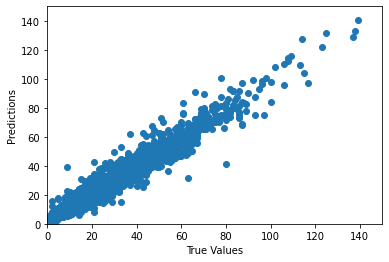

In [15]:
#plot results
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.ylim([0,150])
plt.xlim([0,150])
plt.show()

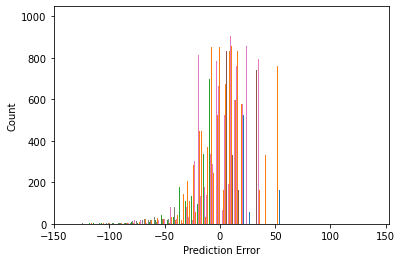

In [16]:
error = test_predictions - y_test
plt.hist(error, 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")